## **Statistical Foundation of Machine Learning**

---

---

In this research we're going to explain three following questions:



*   Comparing two regression algorithms in terms of dealing with missing data.


***Medical Cost Personal Datasets***

This is the Synthetic database. In this research SDV was used to make a synthetic dataset based on this dataset which is originated from Koggle website. (www.kaggle.com/datasets/mirichoi0218/insurance?select=insurance.csv)

The original dataset contains of 7 columns and represents the details on each patients and the charges which indicates individual medical costs for each patient.


*   age: age of primary beneficiary
*   sex: insurance contractor gender, female, male
*   bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   children: Number of children covered by health insurance / Number of dependents
*   smoker: Smoking
*   region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   charges: Individual medical costs billed by health insurance

There are many ways to create synthetic datasets. Two most common methods are:
1. Creating synthetic data based on a real dataset
2. Creating synthetic data from scratch with random numbers. 

The first method is to create synthetic dataset using *Synthetic Data Vault (SDV)*. SDV contains of libraries that helps to make a new dataset which is based on an original dataset and has the same format and statistical properties as the original dataset. 

The second method which is used in this report, is to create synthetic data from the scratch with the help of **"make_regression"** function. This function takes as inputs: n_samples: *number of sample*, n_features: *number of features*, n_informative: *number of useful features* (which basically is the number of features that have an effect on the output label), noise: *bias and standard deviation of the guassian noise*, random_state: *set for same data points for each run*.


---



After generating the random numbers as our dataset, we presented it in pandas form and gave each column a name in order to get a better sense of the dataset. Of course all of these names are randomely chosen for the sake of testing our model and do not have any connection to the data. The chosen feature names are as follow:

**age:** Age of the patient


**years_of_smoking:** The total number of years that the patient has smoked.

**hospital_charges:** The label feature and the expenses a patient has in a hospital which we considered to be between 100 and 15000 euros.

The problem that we defined here is to predict the amount of charges for one person who visits the hospital based on their age and the number of years that they have been smoking. 

Since the goal is to predict a continous number, it is a regresison problem. 


---


The next step is *generating missing data* in the dataset. Since the original dataset does not contain any missing values and this research is about the effects of handling the missing values on regression model, missing values in the dataset is needed. 

One way of generating random missing values in a dataset is to create a mask of boolean and applying it to the dataset. 

In the following code a numpy array of booleans (mask) is generated, with the same shape as the main dataset and the value of "True" as the number of missing values that is needed. After shuffling it, the mask is put on the main dataset and the value of each index that has the "True" value in the mask, is replaced with np.nan. In this research it was decided to replace 1/5 of the dataset with missing values.

This way, the type of the missing values that are generated is Missing Completely at Random (MCAR), meaning that the there is no connection between the data and the place of the missing value and it's completely random and scattered in the dataset. 

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, log_loss, make_scorer, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2, f_regression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import random

## **Data Generation**

**Creating a Synthetic Dataset**

There are many ways to create synthetic datasets. Two most common methods are: 1- Creating synthetic data based on a real dataset, 2- Creating synthetic data from scrach with random numbers. 

The first method is to create synthetic dataset using Synthetic Data Vault(SDV). SDV contains of libraries that helps to make a new dataset which is based on an original dataset and has the same format and statistical properties as the original dataset. 

The seconf method which is used in this report, is to create synthetic data from the scratch with the help of "make_regression" function. This function takes as inputs: n_samples: *number of sample*, n_features: *number of features*, n_informative: *number of useful features* (which basically is the number of features that have an effect on the output label), noise: *bias and standard deviation of the guassian noise*, random_state: *set for same data points for each run*.

After generating the random numbers as our dataset, we presented it in pandas form and gave each column a name. Of course all of these names are randomely chosen for the sake of testing our model and do not have any connection to the data. 

The next step is generating missing data in the dataset. Since the original dataset does not contain any missing values and this research is about the effects of handling the missing values on regression model, missing values in the dataset is needed. 

One way of generating random missing values in a dataset is to create a mask of boolean and applying it to the dataset. 

In the following code a numpy array of booleans (mask) is generated, with the same shape as the main dataset and the value of "True" as the number of missing values that is needed. After shuffling it, the mask is put on the main dataset and the value of each index that has the "True" value in the mask, is replaced with np.nan. In this research it was decided to replace 1/5 of the dataset with missing values.

This way, the type of the missing values that are generated is Missing Completely at Random (MCAR), meaning that the there is no connection between the data and the place of the missing value and it's completely random and scattered in the dataset. 


In [2]:
#Generating the Synthetic Data with make_regression 
def generate_data(my_n_samples, my_n_features):
  #create fake data with make_regression
  X_0, y_0 = make_regression(n_samples=my_n_samples, n_features=my_n_features, n_informative=my_n_features, noise=0, random_state=1)

  #present data in pandas dataframe format
  df = pd.DataFrame(X_0, columns=["age","years_of_smoking"])
  df['hospital_charges'] = y_0

  #normalizing feature values limit
  df['years_of_smoking'] = np.interp(df['years_of_smoking'], (df['years_of_smoking'].min(), df['years_of_smoking'].max()), (1, 50))
  df['age'] = np.interp(df['age'], (df['age'].min(), df['age'].max()), (10, 90))
  df['hospital_charges'] = np.interp(df['hospital_charges'], (df['hospital_charges'].min(), df['hospital_charges'].max()), (100, 15000))

  #GENERATING THE MISSING VALUES:
  # making an array randomly of same size as data of bool type
  x = df.shape[0]
  y = df.shape[1]
  N = 200 #number of needed missing values to generate (one third of the main dataset, df)
  mask = np.zeros(x*y, dtype=bool)
  
  # marking first n indexes as true
  mask[:N] = True
  
  # shuffling the mask
  np.random.shuffle(mask)
  mask = mask.reshape(x, y)
  
  # applying mask to the data
  df[mask] = np.nan

  return df

In [3]:
df = generate_data(1000,2)
display(df)
df2 = df.copy() #for replacing missing values with a different method
print("Missing Values in each column: \n", df.isnull().sum())


,age,years_of_smoking,hospital_charges
0,25.885586,25.219066,3111.279272
1,45.813587,22.776918,6780.831450
2,65.750941,18.169479,10306.506986
3,34.542486,27.952869,4960.663735
4,54.356988,23.479192,8471.703571
...,...,...,...
995,33.699989,19.794957,4249.733497
996,48.298955,13.103571,NaN
997,34.863220,24.724337,4805.159791
998,62.841794,21.535181,9973.266900


Missing Values in each column: 
 age                 71
years_of_smoking    67
hospital_charges    62
dtype: int64


## **Preprocessing and Visualizing**

**Dealing with Missing Values**

The soloution for dealing with missing values differs based on the data. One of the most common ways to replace numeric data like age is by replacing with the average. Of course this way is not that practical if we have outliers, but considering the previous steps of this research and the visualizations, it is known that we do not have outliers in "Schooling" and "Income composition of resources" feature. 

In [4]:
def replace_missing_with_mean(my_df):
  for column in my_df.columns:
    my_df[column] = my_df[column].fillna(my_df[column].mean())

  return my_df

def replace_missing_with_median(my_df):
  for column in my_df.columns:
    my_df[column] = my_df[column].fillna(my_df[column].median())

  return my_df

In [5]:
new_mean_df = replace_missing_with_mean(df)
print("Missing values replaced by mean: \nRemaining Missing Values in each column: \n", new_mean_df.isnull().sum())


new_median_df = replace_missing_with_median(df2)
print("\nMissing values replaced by median: \nRemaining Missing Values in each column: \n", new_median_df.isnull().sum())

Missing values replaced by mean: 
Remaining Missing Values in each column: 
 age                 0
years_of_smoking    0
hospital_charges    0
dtype: int64

Missing values replaced by median: 
Remaining Missing Values in each column: 
 age                 0
years_of_smoking    0
hospital_charges    0
dtype: int64


**Dealing with Outliers**

There are 3 most common ways to deal with outliers. One way is to delete the rows that contain outliers. This method may be practical in a very big dataset but in the dataset of this project, we prefer not to lose the data.

Another way is to mark the outliers and put them in a list and not using them which is basically like the first methon and for the sake of not losing any data, this method is not used here as well.

The third method is to rescale the outliers. In this methon outliers will not be removed completely but it reduces the effects of them. Here we use np.log() to rescale the outliers.

In [6]:
def boxplot_visualize(my_df, xfigsize, yfigsize, figtitle):
  #visualizing the boxplots before rescaling data
  fig, axes = plt.subplots(my_df.shape[1], 1, figsize=(xfigsize, yfigsize), sharey=True)
  fig.suptitle(figtitle)

  i = 0
  for column in my_df.columns:
    sns.boxplot(x=my_df[column],whis = 1.5, ax=axes[i])
    axes[i].set_title(column)
    i += 1

  plt.show()

In [7]:
def plot_visualize(my_df, xfigsize, yfigsize, figtitle, datalabel):
  plt.figure(figsize=(xfigsize, yfigsize)) 
  i = 1 
  plt.suptitle(figtitle)

  for column in my_df.columns:
     if column != datalabel:
       b = random.random();r = random.random();g = random.random() #generate colors
       c = (r, g, b)
       plt.subplot(1, my_df.shape[1]-1, i)
       plt.plot(my_df[column],my_df[datalabel], '.', color=c)
       plt.xlabel(column);plt.ylabel(datalabel)
       i += 1

  plt.show()

In [8]:
def distribution_visualize(my_df, xfigsize, yfigsize, figtitle, datalabel):
  #Making a subplot
  fig, axes = plt.subplots(1, my_df.shape[1]-1, figsize=(xfigsize, yfigsize), sharey=True)
  fig.suptitle(figtitle)
  i = 0

  for column in my_df.columns:
    if column != datalabel:
      sns.histplot(my_df[column],kde=True, ax=axes[i])
      axes[i].set_title(column+' Distribution')
      i += 1

  plt.show()

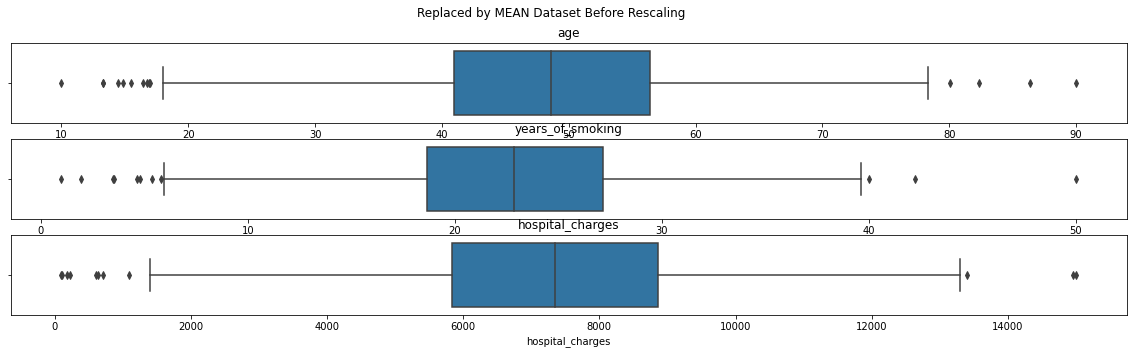

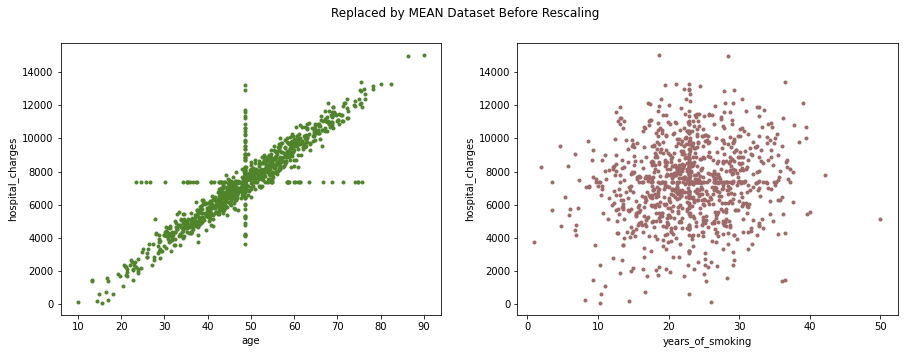

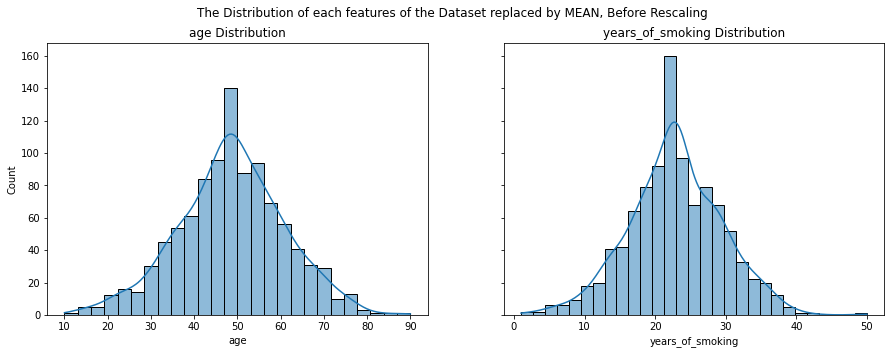


________________________________________________________________________________________________



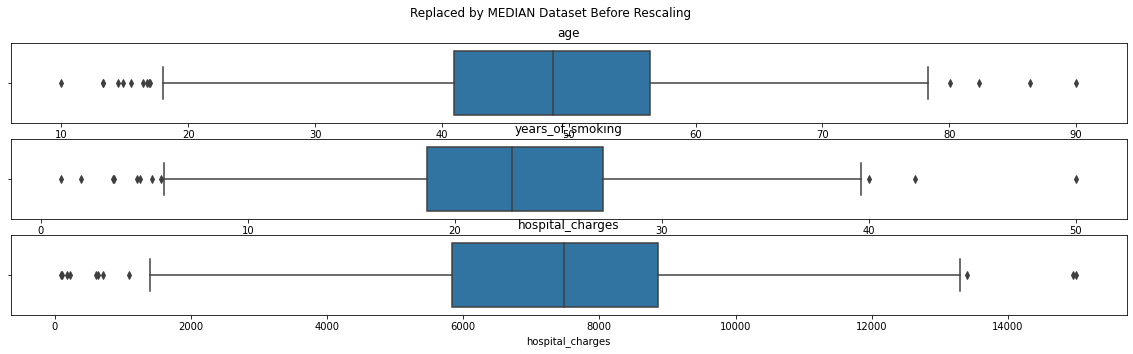

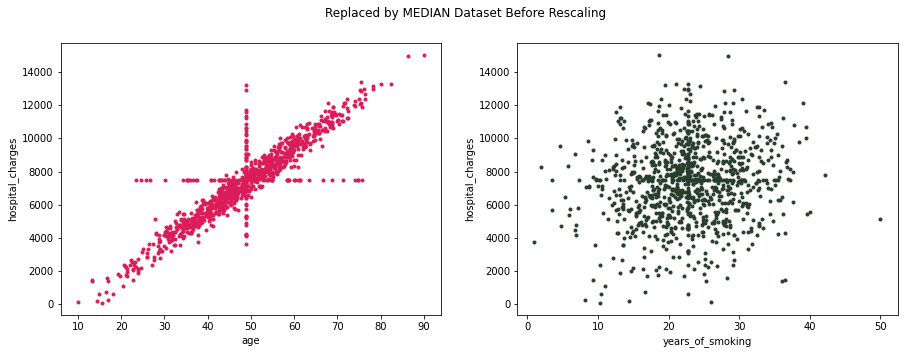

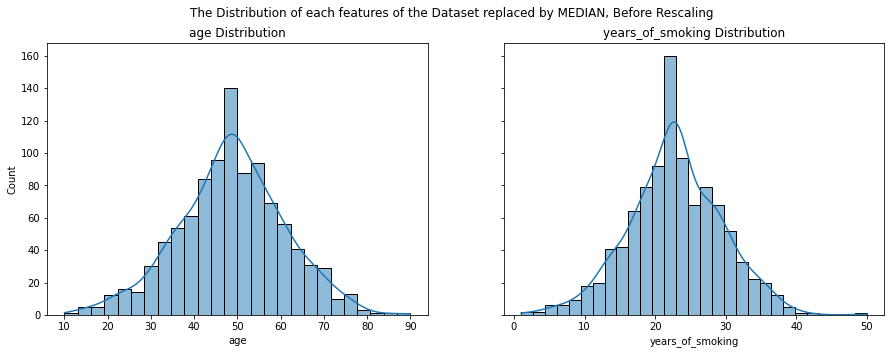


________________________________________________________________________________________________



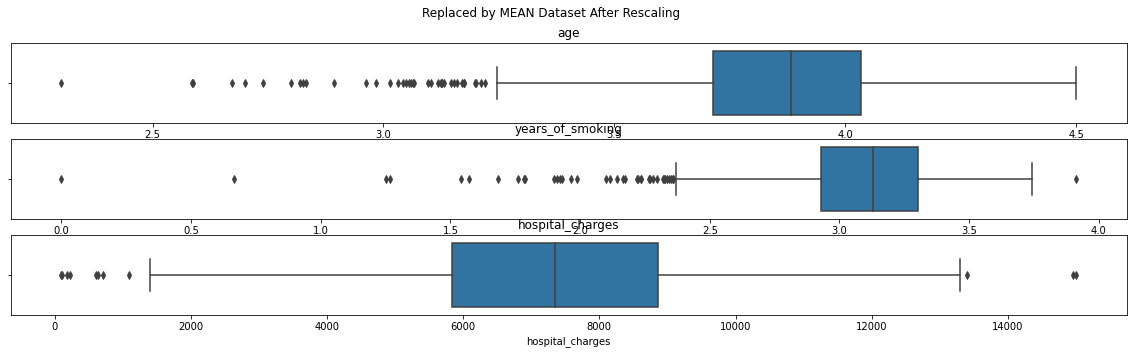

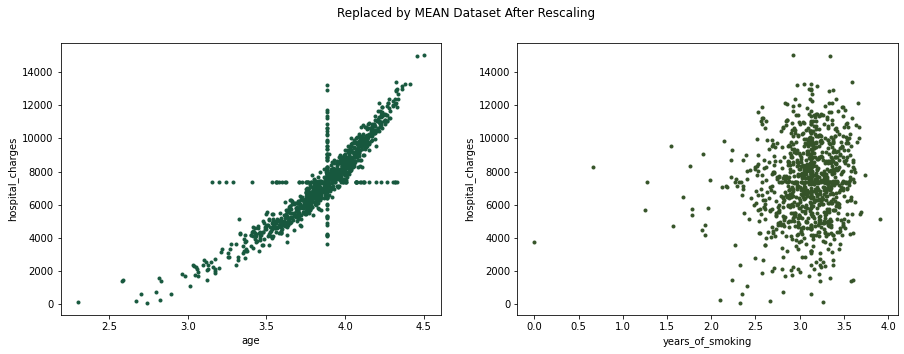

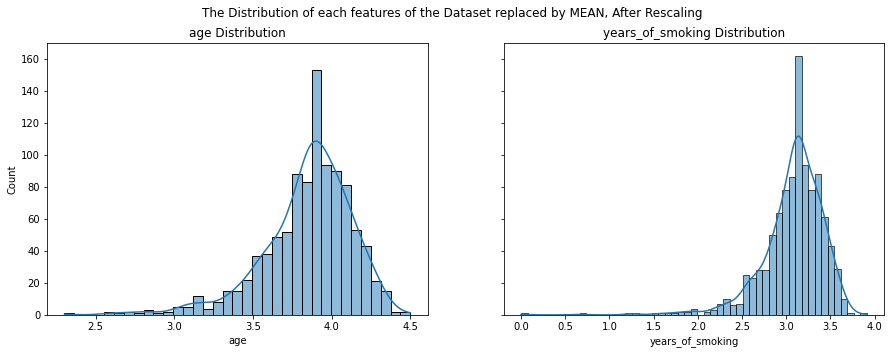


________________________________________________________________________________________________



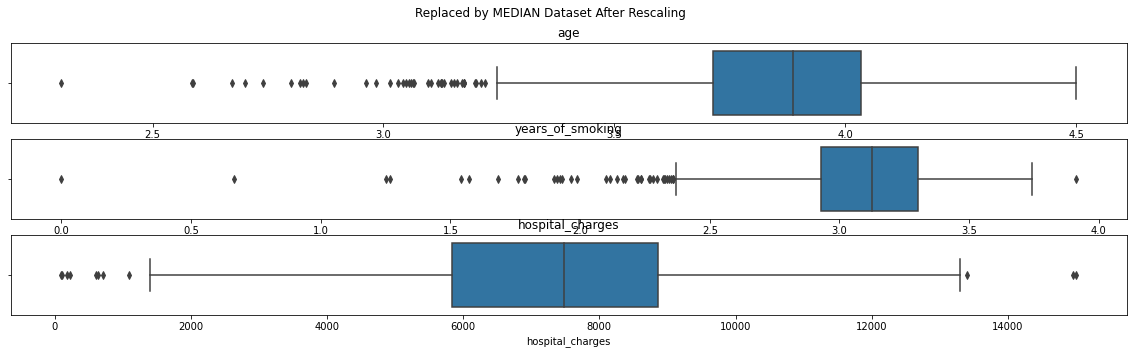

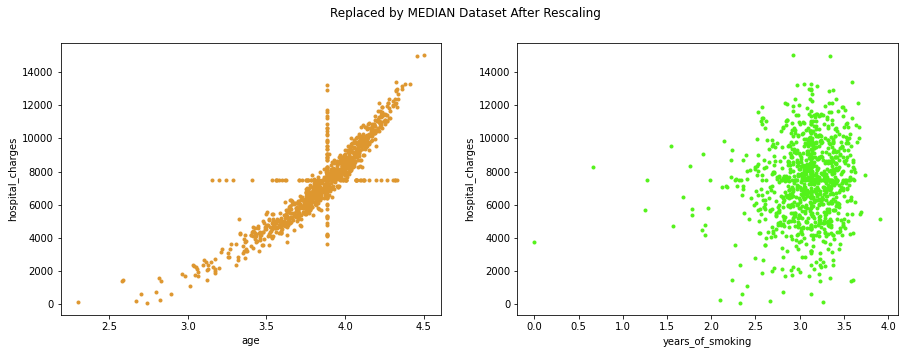

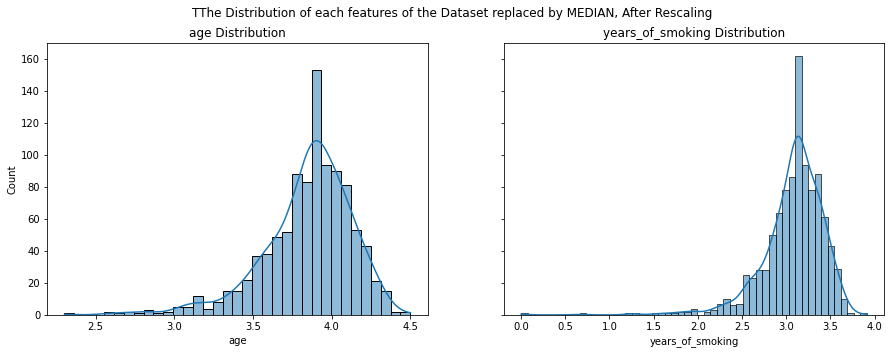

In [9]:
#VISUALIZATION

#visualize mean dataset before rescaling
boxplot_visualize(new_mean_df, 20, 5, 'Replaced by MEAN Dataset Before Rescaling')
plot_visualize(new_mean_df, 15, 5, 'Replaced by MEAN Dataset Before Rescaling', 'hospital_charges')
distribution_visualize(new_mean_df, 15, 5, 'The Distribution of each features of the Dataset replaced by MEAN, Before Rescaling', 'hospital_charges')
print('\n________________________________________________________________________________________________\n')

#visualize median dataset before rescaling
boxplot_visualize(new_median_df, 20, 5, 'Replaced by MEDIAN Dataset Before Rescaling')
plot_visualize(new_median_df, 15, 5, 'Replaced by MEDIAN Dataset Before Rescaling', 'hospital_charges')
distribution_visualize(new_median_df, 15, 5, 'The Distribution of each features of the Dataset replaced by MEDIAN, Before Rescaling', 'hospital_charges')
print('\n________________________________________________________________________________________________\n')

#Rescale data with log
new_mean_df['age'] = [np.log(x) for x in new_mean_df['age']]
new_mean_df['years_of_smoking'] = [np.log(x) for x in new_mean_df['years_of_smoking']]

new_median_df['age'] = [np.log(x) for x in new_median_df['age']]
new_median_df['years_of_smoking'] = [np.log(x) for x in new_median_df['years_of_smoking']]

#visualize mean dataset after rescaling
boxplot_visualize(new_mean_df, 20, 5, 'Replaced by MEAN Dataset After Rescaling')
plot_visualize(new_mean_df, 15, 5, 'Replaced by MEAN Dataset After Rescaling', 'hospital_charges')
distribution_visualize(new_mean_df, 15, 5, 'The Distribution of each features of the Dataset replaced by MEAN, After Rescaling', 'hospital_charges')
print('\n________________________________________________________________________________________________\n')

#visualize median dataset after rescaling
boxplot_visualize(new_median_df, 20, 5, 'Replaced by MEDIAN Dataset After Rescaling')
print('\n\n')
plot_visualize(new_median_df, 15, 5, 'Replaced by MEDIAN Dataset After Rescaling', 'hospital_charges')
distribution_visualize(new_median_df, 15, 5, 'TThe Distribution of each features of the Dataset replaced by MEDIAN, After Rescaling', 'hospital_charges')

**Correlation Matrix**

One of the most popular methods for understandinf the dataset is based on correlation matrix. Correlation matrix show which features are related to each other and change together. correlation scores are between -1 and 1, where 0 shows no correlation. 

This matrix helps us to understand the relation between each feature.

In [10]:
def return_correlations(df1, df2):
  plt.figure(figsize=(15,5))
  corr_mat1 = df1.corr()
  corr_mat2 = df2.corr()

  # 2 row, 1 column, plot 1
  plt.subplot(1, 2, 1)
  cor1 = sns.heatmap(corr_mat1, annot=True, cmap="coolwarm")
  cor1.set_title('Correlation for Dataset with MEAN replacement method')
  
  plt.subplot(1, 2, 2)
  cor2 = sns.heatmap(corr_mat2, annot=True, cmap="coolwarm")
  cor2.set_title('Correlation for Dataset with MEDIAN replacement method')

  plt.show()

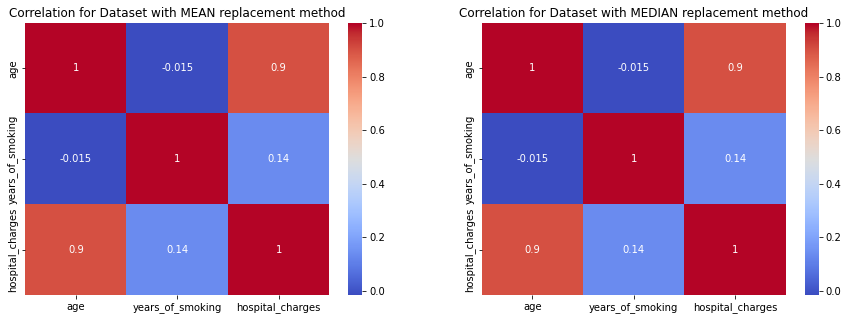

In [11]:
return_correlations(new_mean_df, new_median_df)

---
---
# Linear Regression Model

Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).



For the first regression model, the "Linear Regression Model" was chosen. The main key for choosing the best regression model is to know the dataset and choose the model that best suits it. Based on previous visualizations, it can be understood that the data is linear and as each of the features increase, so does the label value. Therefore, based on the knowledge that was gained so far from the data, the first regression model will be "*Linear Regression Model*"

---
---
# Random Forest Regression Model

Random forest is an ensemble of decision trees. This is to say that many trees, constructed in a certain “random” way form a Random Forest. 

Each tree is created from a different sample of rows and at each node, a different sample of features is selected for splitting. 
Each of the trees makes its own individual prediction. 
These predictions are then averaged to produce a single result. 

For regression the algorithm predicts based on average prediction of the trees for new query. This method is called state of art classifiers and regression. It is proven to be one of the most powerfull and also simple models for prediction, therefore we use it in this report to compare it with 

In [12]:
def seperate_data(my_df, datalabel, my_test_size):
  X = my_df[[column for column in my_df.columns if column != datalabel]]
  y = my_df[datalabel]

  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=my_test_size)

  return X_train, X_test, Y_train, Y_test

In [13]:
def linear_regression(my_df, datalabel, my_test_size):
  X_train, X_test, Y_train, Y_test = seperate_data(my_df, datalabel, my_test_size) #seperating the data

  model = linear_model.LinearRegression() #Building the model
  model.fit(X_train, Y_train)

  Y_pred_train = model.predict(X_train)
  Y_pred_test = model.predict(X_test)

  train_result = {'Model Coefficients':model.coef_,
                  'Train Score':model.score(X_train, Y_train),
                  'Train Mean squared error (MSE)':mean_squared_error(Y_train, Y_pred_train),
                  'Train Coefficient of determination(R^2)':r2_score(Y_train, Y_pred_train)}
  test_result = {'Model Coefficients':model.coef_,
                  'Test Score':model.score(X_test, Y_test),
                  'Test Mean squared error (MSE)':mean_squared_error(Y_test, Y_pred_test),
                  'Test Coefficient of determination(R^2)':r2_score(Y_test, Y_pred_test)}
                
  model_result_visualize(Y_train, Y_pred_train, Y_test, Y_pred_test)
  return train_result, test_result

In [14]:
def random_forest_regression(my_df, datalabel, my_test_size):
  rX_train, rX_test, rY_train, rY_test = seperate_data(my_df, datalabel, my_test_size) #seperating the data

  reg = RandomForestRegressor(n_estimators = 200, random_state = 10, max_depth = 50)
  reg.fit(rX_train, rY_train)

  rY_pred_train = reg.predict(rX_train)
  ry_pred_test = reg.predict(rX_test)

  rfr_train_result = {'Train Score':reg.score(rX_train, rY_train),
                      'Train Mean squared error (MSE)':mean_squared_error(rY_train, rY_pred_train),
                      'Train Coefficient of determination(R^2)':r2_score(rY_train, rY_pred_train)}
  rfr_test_result = {'Test Score':reg.score(rX_test, rY_test),
                      'Test Mean squared error (MSE)':mean_squared_error(rY_test, ry_pred_test),
                      'Test Coefficient of determination(R^2)':r2_score(rY_test, ry_pred_test)}
  model_result_visualize(rY_train, rY_pred_train, rY_test, ry_pred_test)
  return reg, rfr_train_result, rfr_test_result, rX_train, rY_train

In [15]:
def model_result_visualize(model_Y_train, model_Y_pred_train, model_Y_test, model_Y_pred_test):
  plt.figure(figsize=(15,5))
  
  # 2 row, 1 column, plot 1
  plt.subplot(1, 2, 1)
  plt.scatter(x=model_Y_train, y=model_Y_pred_train, c="#7CAE00", alpha=0.3)

  # Add trendline
  # https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
  z = np.polyfit(model_Y_train, model_Y_pred_train, 1)
  p = np.poly1d(z)
  plt.plot(model_Y_test,p(model_Y_test),"#F8766D")

  plt.gca().update(dict(title='Regression Results on Training Data', xlabel='Experimental LogS', ylabel='Predicted LogS'))

  # 2 row, 1 column, plot 2
  plt.subplot(1, 2, 2)
  plt.scatter(x=model_Y_test, y=model_Y_pred_test, c="#619CFF", alpha=0.3)

  z = np.polyfit(model_Y_test, model_Y_pred_test, 1)
  p = np.poly1d(z)
  plt.plot(model_Y_test,p(model_Y_test),"#F8766D")
  plt.gca().update(dict(title='Regression Results on Testing Data', xlabel='Experimental LogS', ylabel='Predicted LogS'))

  plt.show()

---
---
# Question: How do the Linear Regression and Random Forest Regression models as regression machine learning algorithms, compare in terms of dealing with missing data on the used dataset?

The goal of this research is to answer the question of comparing the performance of two regression algorithm on datasets containing missing data and dealt with them in different ways.
In the next part we compare the performance of the two algorithms on the dataset that replaced data with *mean value*. 





Results of <<Linear Regression Model>> on the data replaced by MEAN 



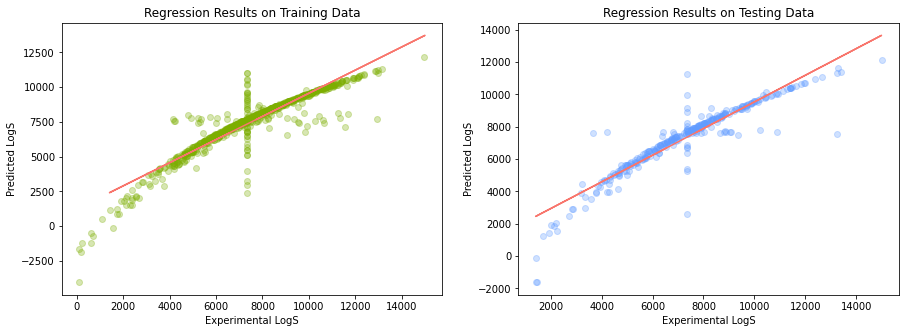

The results of Linear Regression Model:

The results on the TRAIN dataset:
Model Coefficients   :   [7498.70895189  928.55164664]
Train Score   :   0.8331900114472834
Train Mean squared error (MSE)   :   944727.4217228116
Train Coefficient of determination(R^2)   :   0.8331900114472834

_________________________________________

The results on the TEST dataset:
Model Coefficients   :   [7498.70895189  928.55164664]
Test Score   :   0.8477635228399691
Test Mean squared error (MSE)   :   858194.3381443572
Test Coefficient of determination(R^2)   :   0.8477635228399691


In [16]:
#Creating Linear Regression Model and displaying the results

print('\033[1m' + 'Results of <<Linear Regression Model>> on the data replaced by MEAN'+ '\033[0m \n')

linear_result_train, linear_result_test = linear_regression(new_mean_df, 'hospital_charges', .3)

print('The results of Linear Regression Model:\n')

print('The results on the TRAIN dataset:')
for key, value in linear_result_train.items():
    print(key, '  :  ', value)
print('\n_________________________________________\n')

print('The results on the TEST dataset:')
for key, value in linear_result_test.items():
    print(key, '  :  ', value)

Results of <<Random Forest Regression Model>> on the data replaced by MEAN 



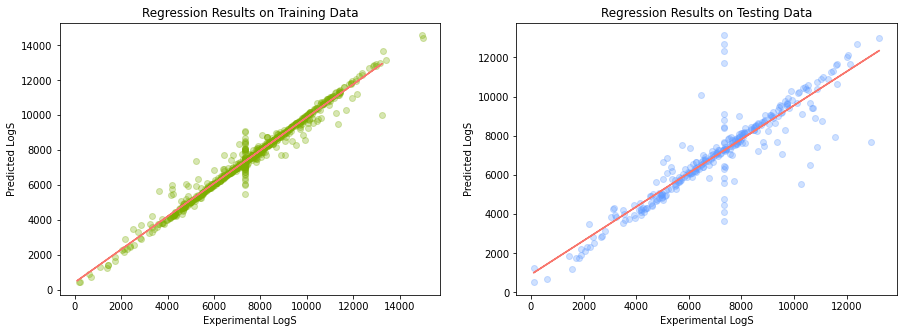

The results of Random Forest Regression Model:

The results on the TRAIN dataset:
Train Score   :   0.9737681021520771
Train Mean squared error (MSE)   :   143317.60007188347
Train Coefficient of determination(R^2)   :   0.9737681021520771

_________________________________________

The results on the TEST dataset:
Test Score   :   0.8120768978840365
Test Mean squared error (MSE)   :   1120170.1380252533
Test Coefficient of determination(R^2)   :   0.8120768978840365


In [17]:
#Creating Random Forest Regression Model and displaying the results

print('\033[1m' + 'Results of <<Random Forest Regression Model>> on the data replaced by MEAN'+ '\033[0m \n')

rf_reg_model, rfr_train_result, rfr_test_result, rX_train, rY_train = random_forest_regression(new_mean_df, 'hospital_charges', .3)

print('The results of Random Forest Regression Model:\n')

print('The results on the TRAIN dataset:')
for key, value in rfr_train_result.items():
    print(key, '  :  ', value)
print('\n_________________________________________\n')

print('The results on the TEST dataset:')
for key, value in rfr_test_result.items():
    print(key, '  :  ', value)

As seen above, the performance of Random Forest Regression Model tend to be slightly better than Linear Regression Model in case of replacing the missing data with MEAN. 

However, as we can see the gap between in-sample error and out-sample error for Random Forest Regression is more than Linear Regression Model. Meaning that Random Forest Regression is more capable of overfitting the dataset, while Linear Regression Model keeps a balance between these two errors on test and trainig data. 


---




---

Below we will repeat the process on the dataset which its missing values have been replaced by median and we will compare the performance of the two algorithms on it and at the end we can decide which algorithm works best for which method of replacing the missing values.

Results of <<Linear Regression Model>> on the data replaced by MEDIAN 



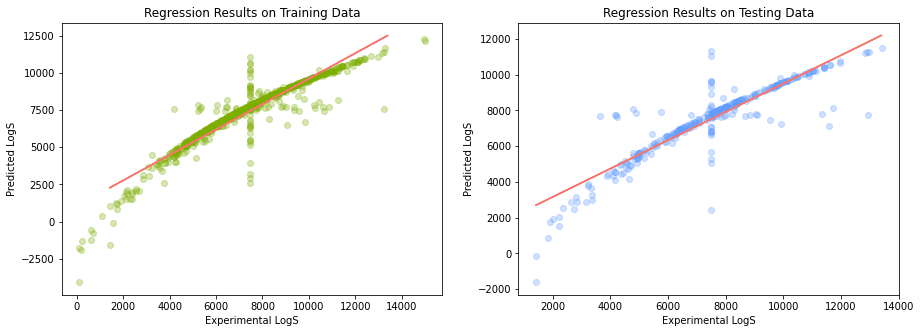

The results of Linear Regression Model:

The results on the TRAIN dataset:
Model Coefficients   :   [7540.03137225 1012.44859269]
Train Score   :   0.8551814037453112
Train Mean squared error (MSE)   :   827063.2637751463
Train Coefficient of determination(R^2)   :   0.8551814037453112

_________________________________________

The results on the TEST dataset:
Model Coefficients   :   [7540.03137225 1012.44859269]
Test Score   :   0.7979121664464096
Test Mean squared error (MSE)   :   1119147.7590289882
Test Coefficient of determination(R^2)   :   0.7979121664464096


In [18]:
#Creating Linear Regression Model and displaying the results

print('\033[1m' + 'Results of <<Linear Regression Model>> on the data replaced by MEDIAN'+ '\033[0m \n')

med_linear_result_train, med_linear_result_test = linear_regression(new_median_df, 'hospital_charges', .3)

print('The results of Linear Regression Model:\n')

print('The results on the TRAIN dataset:')
for key, value in med_linear_result_train.items():
    print(key, '  :  ', value)
print('\n_________________________________________\n')

print('The results on the TEST dataset:')
for key, value in med_linear_result_test.items():
    print(key, '  :  ', value)

Results of <<Random Forest Regression Model>> on the data replaced by MEDIAN 



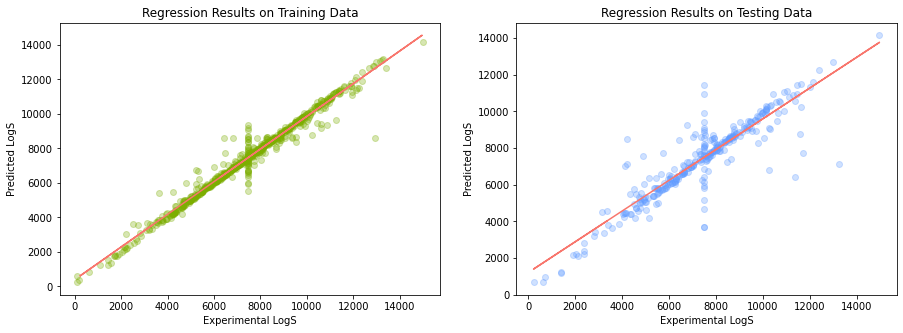

The results of Random Forest Regression Model:

The results on the TRAIN dataset:
Train Score   :   0.9726515621850796
Train Mean squared error (MSE)   :   156375.31228844257
Train Coefficient of determination(R^2)   :   0.9726515621850796

_________________________________________

The results on the TEST dataset:
Test Score   :   0.8146204233438907
Test Mean squared error (MSE)   :   1023250.2976127143
Test Coefficient of determination(R^2)   :   0.8146204233438907


In [19]:
#Creating Random Forest Regression Model and displaying the results

print('\033[1m' + 'Results of <<Random Forest Regression Model>> on the data replaced by MEDIAN'+ '\033[0m \n')

med_rf_reg_model, med_rfr_train_result, med_rfr_test_result, med_rX_train, med_rY_train = random_forest_regression(new_median_df, 'hospital_charges', .3)


print('The results of Random Forest Regression Model:\n')

print('The results on the TRAIN dataset:')
for key, value in med_rfr_train_result.items():
    print(key, '  :  ', value)
print('\n_________________________________________\n')

print('The results on the TEST dataset:')
for key, value in med_rfr_test_result.items():
    print(key, '  :  ', value)

<Figure size 1080x360 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


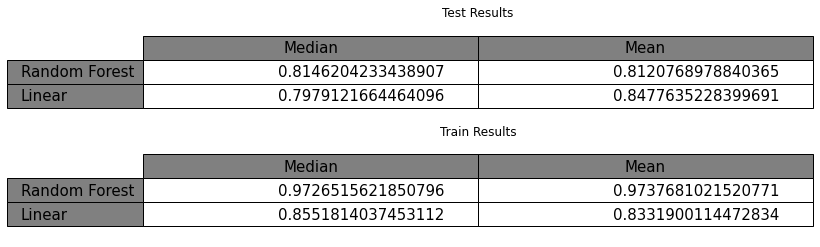

In [20]:
plt.figure(figsize=(15,5))
plt.rcParams["figure.autolayout"] = True

fig, ax =plt.subplots(2,1)

ax[0].set_title('Test Results')
data=[[med_rfr_test_result['Test Coefficient of determination(R^2)'], rfr_test_result['Test Coefficient of determination(R^2)']],
      [med_linear_result_test['Test Coefficient of determination(R^2)'], linear_result_test['Test Coefficient of determination(R^2)']]]
column_labels=["Median", "Mean"]

ax[0].axis('off')
test_table = ax[0].table(cellText=data,colLabels=column_labels,rowLabels=["Random Forest","Linear"],loc="center",rowColours =["gray"] * 3, colColours =["gray"] * 3)
test_table.set_fontsize(15)
test_table.scale(2, 2)

data_=[[med_rfr_train_result['Train Coefficient of determination(R^2)'], rfr_train_result['Train Coefficient of determination(R^2)']],
      [med_linear_result_train['Train Coefficient of determination(R^2)'], linear_result_train['Train Coefficient of determination(R^2)']]]
column_labels_=["Median", "Mean"]

ax[1].set_title('Train Results')
ax[1].axis('tight')
ax[1].axis('off')
train_table = ax[1].table(cellText=data_,colLabels=column_labels_,rowLabels=["Random Forest","Linear"],loc="center",rowColours =["gray"] * 3, colColours =["gray"] * 3)
train_table.auto_set_font_size(False)
train_table.set_fontsize(15)
train_table.scale(2, 2)

plt.show()

**Conclusion of Question:**

*Comparing the replacement methods:* As the tables show, for the training data, using MEAN as a method to replace the missing values works better, however it does not show a sifficient result on the test data. The reason for this is that the MEAN method is more sensitive to outliers and although we decreased the effect of outliers as much as possible, it still affects our data and therefore misslead MEAN method slightly. 

So for this dataset MEDIAN proved to be a better method for replacing the missing values. However this could always change depending on the dataset.


---

As for the best model for this dataset we can see that the Random Forest Regression works best on test data, however, its performance shows to be weaker on training dataset than Linear Regression. The reason for this is that Random Forest Regression not only uses random samples to create new trees, but also it chooses random features as well to find the best set of features for the desired output and prevent overfitting. 

With this amazig feature selection, Random Forest Regression tends to keep a balance between in-sample error and out-of-sample error and avoid overfitting and therefore it works better specially on datasets with more dimentions.

---
---
# References


1. https://www.kaggle.com/datasets/volodymyrgavrysh/heart-disease
2. https://archive.ics.uci.edu/ml/datasets/Heart+Disease
3. https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm#:~:text=Correlation%20coefficients%20whose%20magnitude%20are%20between%200.7%20and%200.9%20indicate,can%20be%20considered%20highly%20correlated.
4. https://cmdlinetips.com/2020/02/lower-triangle-correlation-heatmap-python/
5.   https://www.webucator.com/article/python-color-constants-module/
6.   https://www.kaggle.com/code/caesarmario/heart-disease-eda-prediction/notebook
10.   https://datascientyst.com/set-caption-customize-font-size-color-in-pandas-dataframe/
16. https://towardsdatascience.com/data-normalization-in-machine-learning-395fdec69d02#:~:text=Normalization%20gives%20equal%20weights%2Fimportance,belong%20to%20a%20certain%20cluster.
17. https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
18. https://www.kaggle.com/code/shtrausslearning/heart-disease-gaussian-process-models
19. https://www.v7labs.com/blog/train-validation-test-set#:~:text=The%20validation%20set%20is%20a,model's%20hyperparameters%20and%20configurations%20accordingly.
20. https://towardsdatascience.com/why-and-how-to-cross-validate-a-model-d6424b45261f
21. https://machinelearningmastery.com/k-fold-cross-validation/
22. https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/
23. https://www.mygreatlearning.com/blog/gridsearchcv/
24. https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/
25. https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761#:~:text=Summary-,The%20k%2Dnearest%20neighbors%20(KNN)%20algorithm%20is%20a%20simple,that%20data%20in%20use%20grows.
26. https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
27. https://sijanb.com.np/posts/how-to-tune-hyperparameter-in-k-nearest-neighbors-classifier/
28. https://www.mygreatlearning.com/blog/gridsearchcv/
29. https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/
30. https://vitalflux.com/learning-curves-explained-python-sklearn-example/
31. https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/
32. https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf
34. https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm

1. https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/
2. https://machinelearninginterview.com/topics/machine-learning/run-time-of-an-ml-algorithm-important/
3. https://towardsdatascience.com/importance-of-understanding-the-complexity-of-a-machine-learning-algorithm-9d0532685982
4. https://www.pre-scient.com/blogs/cad-software-development/6-factors-to-consider-while-selecting-any-algorithm-library.html
5. http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/#example-3-decision-region-grids
6. https://en.wikipedia.org/wiki/Generalization_error
7. https://rpubs.com/cbarco/In_sample_and_out_of_sample_error#:~:text=In%2Dsample%20errors%20are%20errors,to%20build%20the%20training%20predictor.
8. https://neptune.ai/
